# Data Visualization with Seaborn

Before we start, we need to make sure **seaborn** package had been installed. 

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Data from here <href>https://www.kaggle.com/uciml/adult-census-income</href>

**Adult Census Income**

Predict whether income exceeds $50K/yr based on census data

In [3]:
df = pd.read_csv('adult.csv')

In [5]:
len(df)

32561

In order to better illustrate some of the plots, let's sample only **3000 observations**. But you shouldn't do it in the project.

In [7]:
# use sample() to sample only 3000 observations
df=df.sample(3000,random_state=1)

In [9]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
9646,24,Private,336088,HS-grad,9,Divorced,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Female,0,0,50,United-States,<=50K
709,34,Federal-gov,190228,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,1902,48,United-States,>50K
7385,18,Private,104704,HS-grad,9,Never-married,Adm-clerical,Own-child,Black,Male,0,0,40,United-States,<=50K
16671,44,Private,36271,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
21932,27,Private,178709,Masters,14,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11184,37,Private,178136,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,United-States,<=50K
26394,32,Self-emp-not-inc,56026,Bachelors,13,Married-civ-spouse,Sales,Other-relative,White,Male,0,0,45,United-States,<=50K
8894,26,Private,205428,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
6038,26,Private,125680,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,0,0,16,Japan,<=50K


In [11]:
# Check correlation between variables
df.corr(numeric_only=True)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.059705,0.031606,0.061716,0.069599,0.071696
fnlwgt,-0.059705,1.000000,-0.013528,0.016938,-0.001787,-0.030960
education.num,0.031606,-0.013528,1.000000,0.107539,0.092114,0.167610
capital.gain,0.061716,0.016938,0.107539,1.000000,-0.032471,0.080224
capital.loss,0.069599,-0.001787,0.092114,-0.032471,1.000000,0.068137
hours.per.week,0.071696,-0.030960,0.167610,0.080224,0.068137,1.000000


In [13]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,3000.00000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.86300,1.911785e+05,10.102667,1085.617000,92.505667,40.225000
std,13.92083,1.108574e+05,2.588248,7450.012111,415.274670,12.522273
min,17.00000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,27.00000,1.162048e+05,9.000000,0.000000,0.000000,40.000000
50%,37.00000,1.793355e+05,10.000000,0.000000,0.000000,40.000000
75%,48.00000,2.405478e+05,13.000000,0.000000,0.000000,45.000000
max,90.00000,1.366120e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,3000.00000,3000,3.000000e+03,3000,3000.000000,3000,3000,3000,3000,3000,3000.000000,3000.000000,3000.000000,3000,3000
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,39,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,2068,NaN,979,NaN,1363,389,1206,2556,1997,NaN,NaN,NaN,2685,2275
mean,38.86300,NaN,1.911785e+05,NaN,10.102667,NaN,NaN,NaN,NaN,NaN,1085.617000,92.505667,40.225000,NaN,NaN
std,13.92083,NaN,1.108574e+05,NaN,2.588248,NaN,NaN,NaN,NaN,NaN,7450.012111,415.274670,12.522273,NaN,NaN
min,17.00000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,27.00000,NaN,1.162048e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.00000,NaN,1.793355e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.00000,NaN,2.405478e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [17]:
df.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation        False
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country    False
income            False
dtype: bool

### Type of variables

<ul>
<li><b>Numeric</b> (e.g., age): a variable with many (sometimes infinite) possible numeric values
<li><b>Categorical</b> (e.g., sex, race): a variable with a finite set of values. There is no intrinsic order between them (sexes or races cannot be sorted from smaller to larger)
<li><b>Ordinal</b> (e.g., education.num, income): a variable with a finite set of values that can be sorted. 
</ul>

### Graphs from .groupby() followed by .count().plot()

**With education.num which is a Numeric or continuous column**

**Use .groupby followed by .count().plot()**

In [19]:
df.groupby('education.num')['education.num'].count()

education.num
1       6
2      12
3      22
4      63
5      57
6      78
7     125
8      37
9     979
10    641
11    115
12    106
13    483
14    181
15     55
16     40
Name: education.num, dtype: int64

<Axes: xlabel='education.num'>

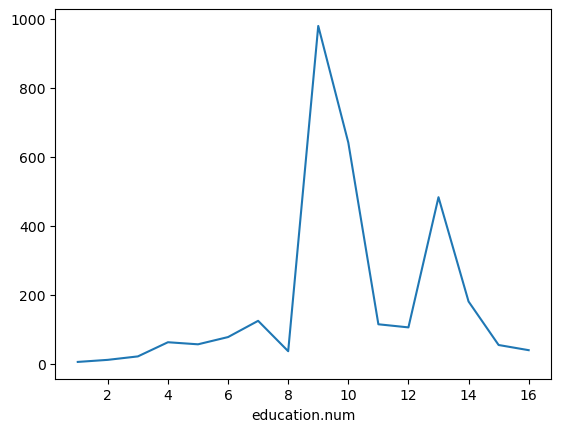

In [21]:
df.groupby('education.num')['education.num'].count().plot()

**With marital.status which is a categorical column**

**Use .groupby followed by .count().plot(kind='pie')**

In [23]:
df.groupby('marital.status')['marital.status'].count()

marital.status
Divorced                  401
Married-AF-spouse           3
Married-civ-spouse       1363
Married-spouse-absent      44
Never-married             992
Separated                 100
Widowed                    97
Name: marital.status, dtype: int64

<Axes: xlabel='marital.status'>

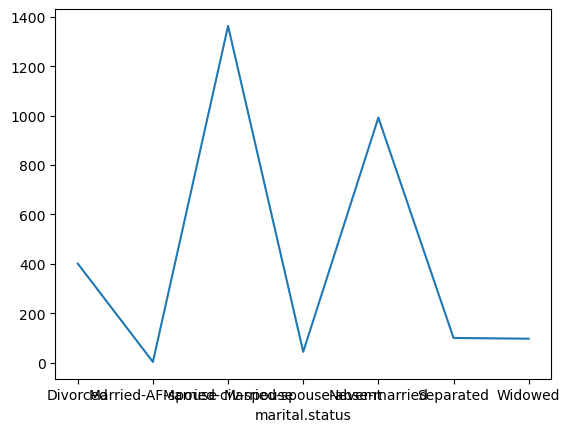

In [25]:
df.groupby('marital.status')['marital.status'].count().plot()

<Axes: ylabel='marital.status'>

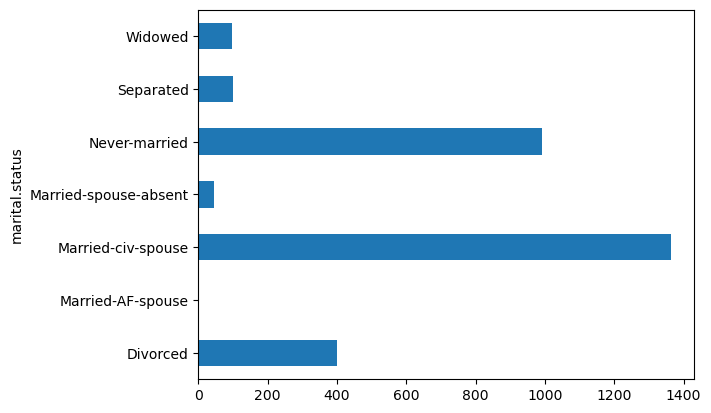

In [31]:
# display bar chart 'barh'
df.groupby('marital.status')['marital.status'].count().plot(kind='barh')

<Axes: ylabel='marital.status'>

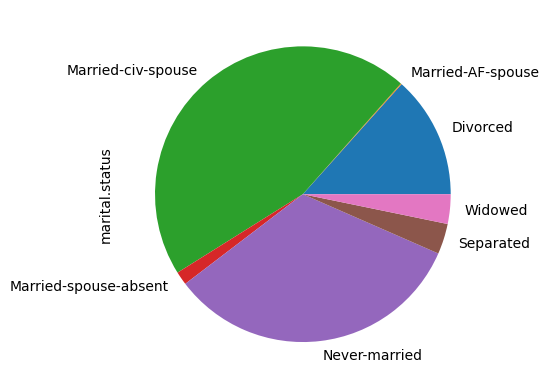

In [33]:
# display pie chart 'pie'
df.groupby('marital.status')['marital.status'].count().plot(kind='pie')

<Axes: ylabel='marital.status'>

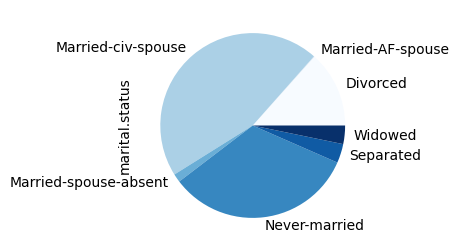

In [35]:
df.groupby('marital.status')['marital.status'].count().\
            plot(kind='pie',figsize=(5,3),cmap="Blues")

<Axes: ylabel='marital.status'>

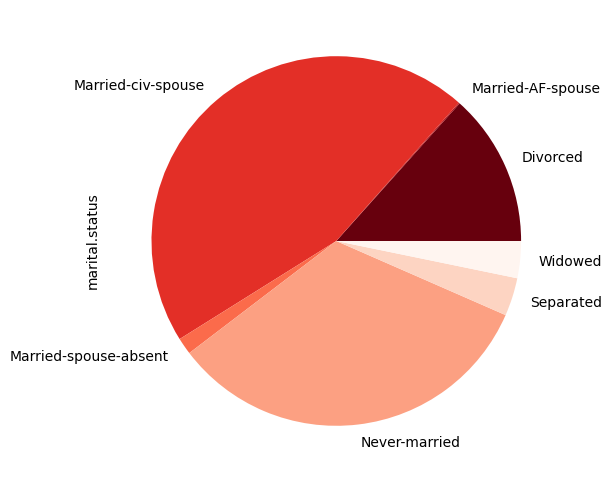

In [37]:
df.groupby('marital.status')['marital.status'].count().\
                plot(kind='pie',figsize=(10,6),cmap="Reds_r")

### Discretization

<p>We can turn a numeric variable into an ordinal one through two functions.</p>
<p>
<ul>
<li>For <b>equal-width binning</b>, use <b>pandas.cut</b>.  All bins will be of the same width.
<li>For <b>equal-frequency binning</b>, use <b>pandas.qcut</b>.  All bins will (attempt to) have the same number of records.
</ul>
</p>

<b>Example</b>: Discretize <i>age</i> into 5 bins of equal width

In [39]:
df2 = df.copy()

In [41]:
# appy cut() to discretize age into 5 bins
df2['discretized_age_EW']=pd.cut(df2.age, 5)

In [43]:
df2

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,discretized_age_EW
9646,24,Private,336088,HS-grad,9,Divorced,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Female,0,0,50,United-States,<=50K,"(16.927, 31.6]"
709,34,Federal-gov,190228,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,1902,48,United-States,>50K,"(31.6, 46.2]"
7385,18,Private,104704,HS-grad,9,Never-married,Adm-clerical,Own-child,Black,Male,0,0,40,United-States,<=50K,"(16.927, 31.6]"
16671,44,Private,36271,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,"(31.6, 46.2]"
21932,27,Private,178709,Masters,14,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K,"(16.927, 31.6]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11184,37,Private,178136,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,United-States,<=50K,"(31.6, 46.2]"
26394,32,Self-emp-not-inc,56026,Bachelors,13,Married-civ-spouse,Sales,Other-relative,White,Male,0,0,45,United-States,<=50K,"(31.6, 46.2]"
8894,26,Private,205428,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K,"(16.927, 31.6]"
6038,26,Private,125680,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,0,0,16,Japan,<=50K,"(16.927, 31.6]"


In [45]:
df2['discretized_age_EW'].unique()

[(16.927, 31.6], (31.6, 46.2], (60.8, 75.4], (46.2, 60.8], (75.4, 90.0]]
Categories (5, interval[float64, right]): [(16.927, 31.6] < (31.6, 46.2] < (46.2, 60.8] < (60.8, 75.4] < (75.4, 90.0]]

<b>Example</b>: Discretize <i>age</i> into 5 bins of equal frequency

In [51]:
# appy qcut() to discretize age into 5 bins of equal frequency
df2['discretized_age_EF']=pd.qcut(df2.age, 5)

In [53]:
df2['discretized_age_EF'].unique()

[(16.999, 26.0], (26.0, 34.0], (42.0, 51.0], (34.0, 42.0], (51.0, 90.0]]
Categories (5, interval[float64, right]): [(16.999, 26.0] < (26.0, 34.0] < (34.0, 42.0] < (42.0, 51.0] < (51.0, 90.0]]

### One numeric variable

**age**

<Axes: xlabel='age'>

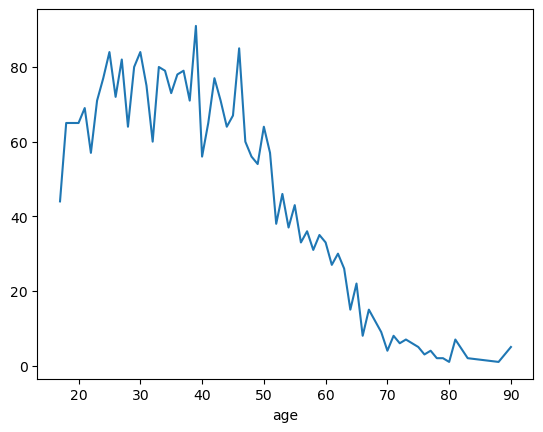

In [55]:
df.groupby('age')['age'].count().plot()

<Axes: xlabel='age'>

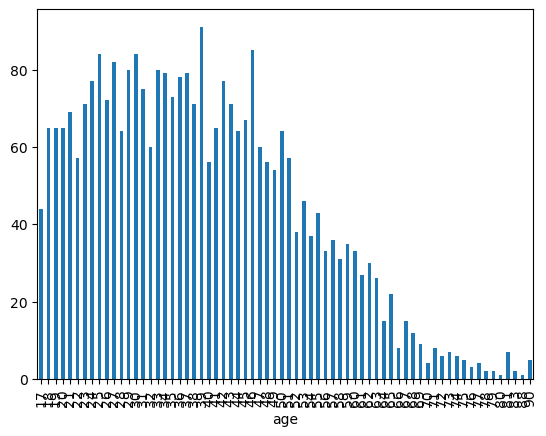

In [57]:
df.groupby('age')['age'].count().plot(kind='bar')

<Axes: xlabel='age', ylabel='Density'>

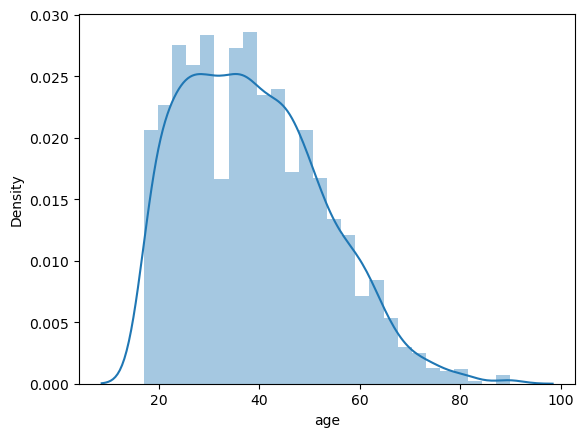

In [59]:
# distplot plots a univariate distribution of observations
sns.distplot(df.age)

<Axes: xlabel='age', ylabel='Density'>

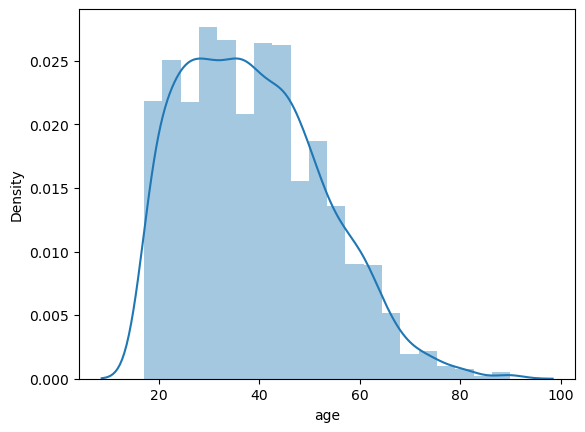

In [61]:
sns.distplot(df.age, bins=20)

**discretized_age_EW, discretized_age_EF**

<Axes: xlabel='discretized_age_EW', ylabel='count'>

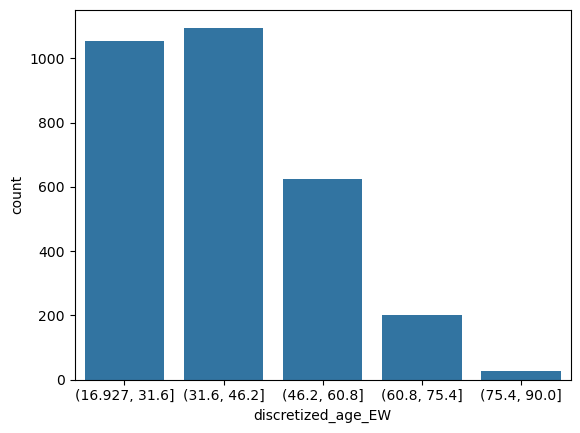

In [63]:
sns.countplot(x='discretized_age_EW', data=df2)

<Axes: xlabel='discretized_age_EF', ylabel='count'>

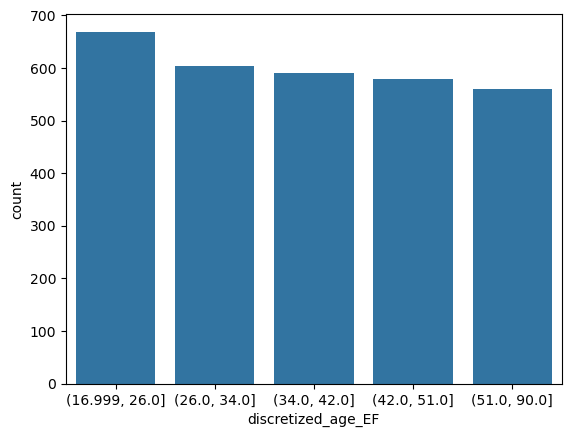

In [65]:
sns.countplot(x='discretized_age_EF', data=df2)

In [67]:
df2.groupby('discretized_age_EF')['discretized_age_EF'].size()

discretized_age_EF
(16.999, 26.0]    669
(26.0, 34.0]      604
(34.0, 42.0]      590
(42.0, 51.0]      578
(51.0, 90.0]      559
Name: discretized_age_EF, dtype: int64

**education**

In [69]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

**With education column, which is a Categorical(nominal) column**

<Axes: xlabel='education', ylabel='count'>

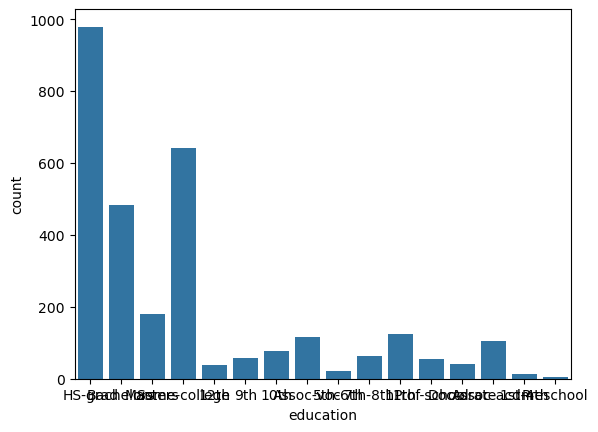

In [71]:
sns.countplot(x='education', data=df)

<Axes: xlabel='count', ylabel='education'>

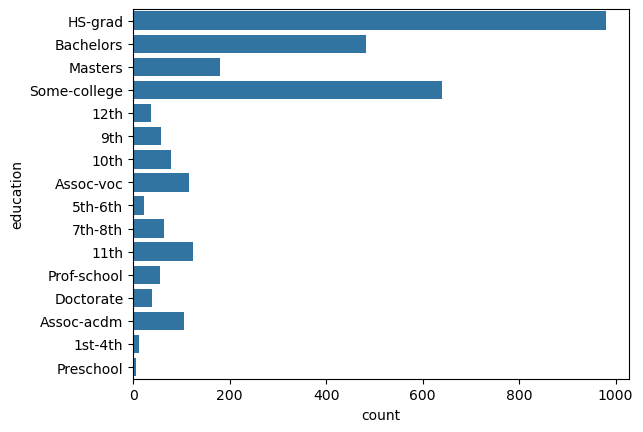

In [73]:
sns.countplot(y='education', data=df)

**race**

<Axes: xlabel='race', ylabel='count'>

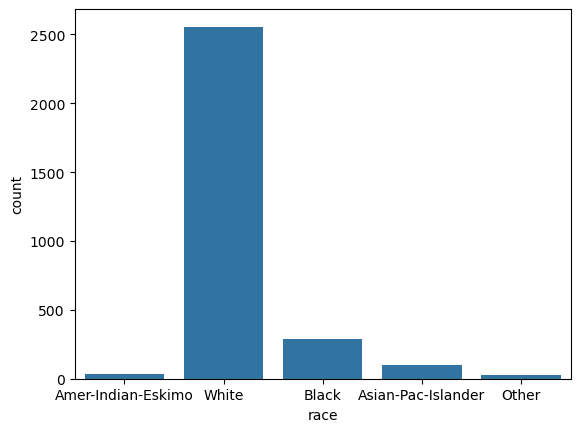

In [75]:
sns.countplot(x='race', data=df)

### One categorical vs one numeric variable

For each value of "marital.status", display the mean age

In [77]:
df['marital.status'].unique()

array(['Divorced', 'Married-civ-spouse', 'Never-married', 'Separated',
       'Married-spouse-absent', 'Widowed', 'Married-AF-spouse'],
      dtype=object)

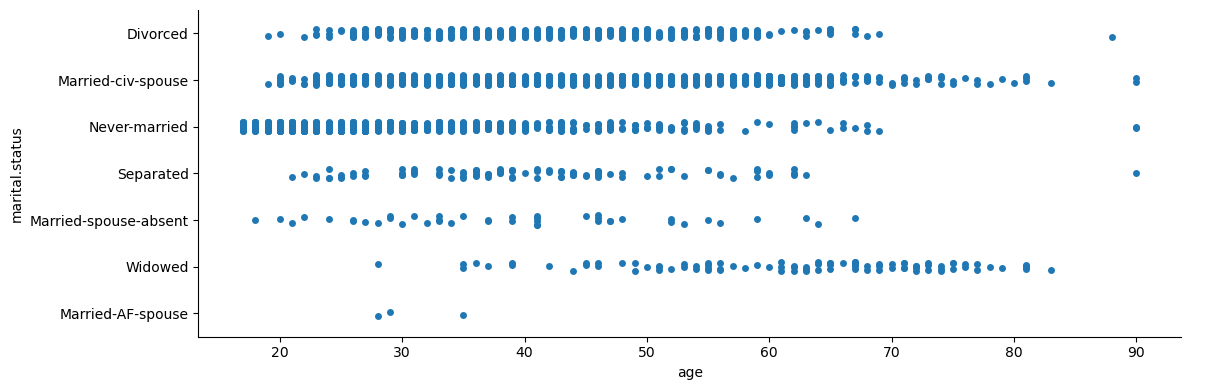

In [79]:
# catplot() stands for Categorical Plot. 
# The aspect will change the width while keeping the height constant.
sns.catplot(y='marital.status', data=df, x='age', height=4,aspect=3)

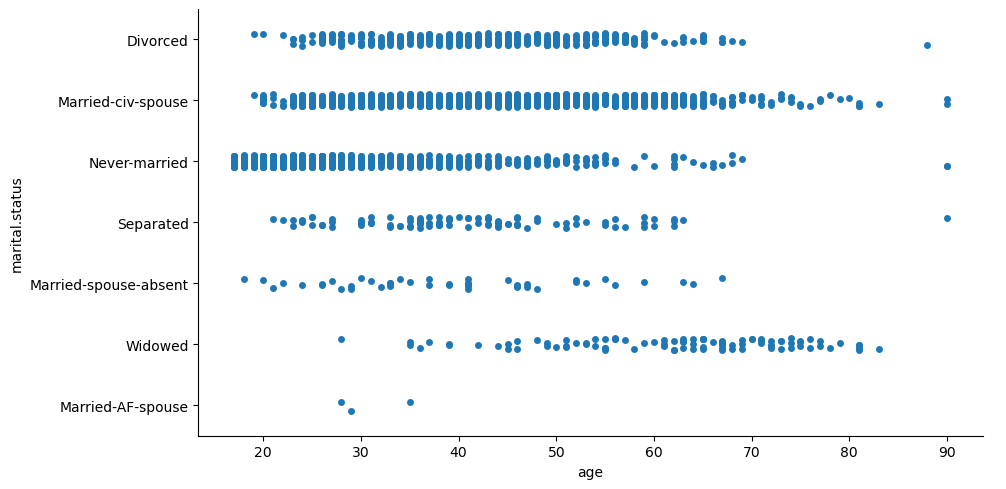

In [81]:
sns.catplot(y='marital.status', data=df, x='age',aspect=2, kind='strip')

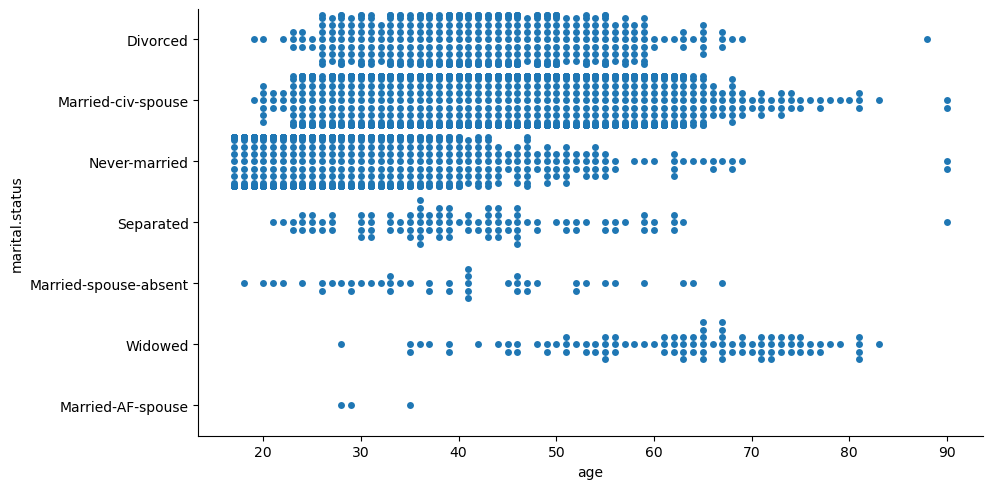

In [83]:
sns.catplot(y='marital.status', data=df, x='age',aspect=2, kind='swarm')

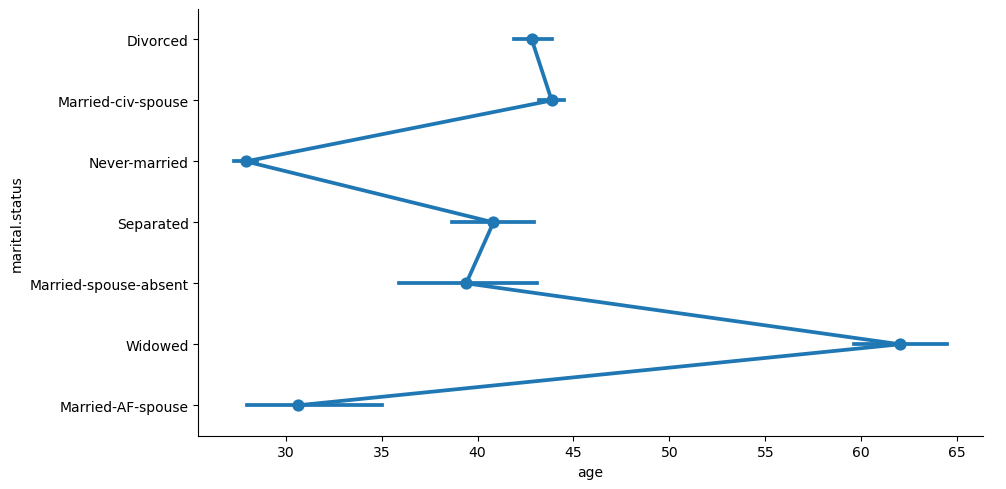

In [85]:
sns.catplot(y='marital.status', data=df, x='age',\
               aspect=2, kind='point')

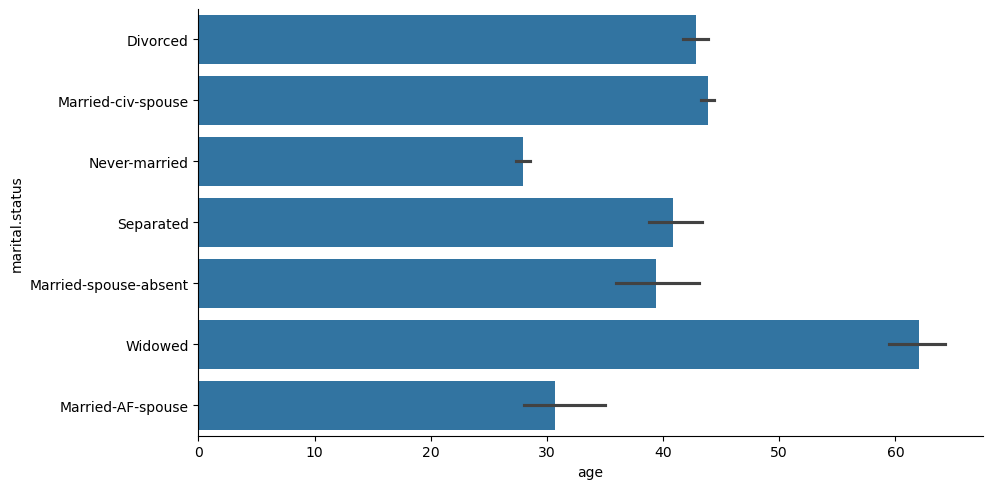

In [87]:
sns.catplot(y='marital.status', data=df, x='age', aspect=2, kind='bar')

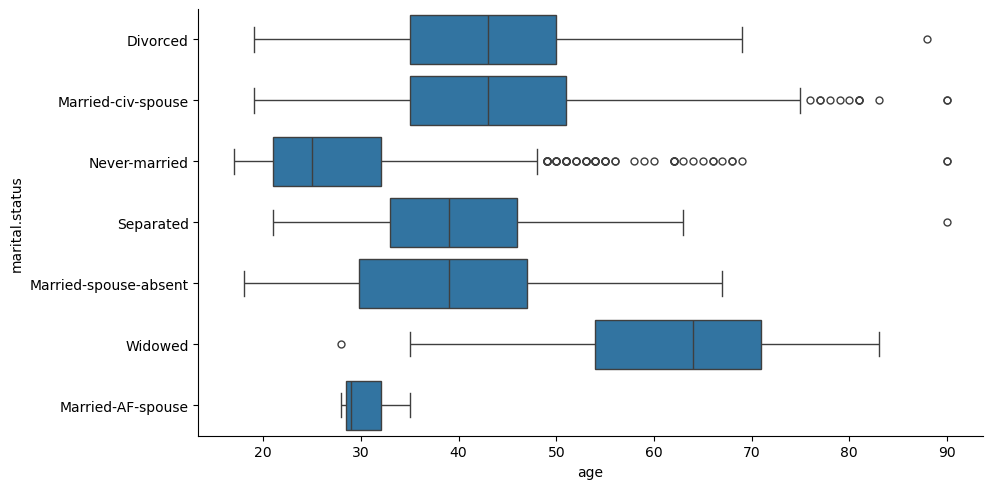

In [89]:
sns.catplot(y='marital.status', data=df, x='age', aspect=2, kind='box')

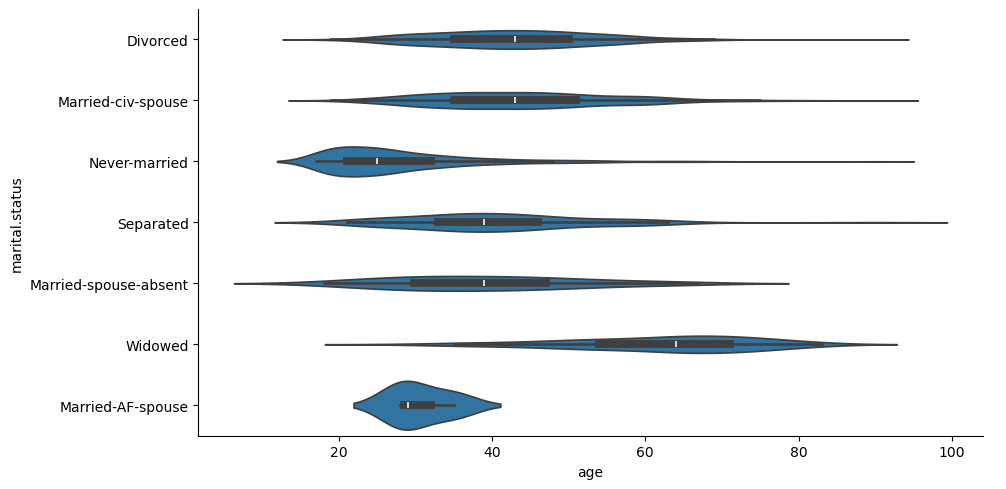

In [91]:
sns.catplot(y='marital.status', data=df, x='age', aspect=2, kind='violin')

### Two numeric variables (Regression)

A regression plot. Here there are no two numeric variables that are particularly strongly correlated

We want to assess whether education.num determines hours.per.week (how many hours per week)

In [93]:
df.corr(numeric_only=True)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.059705,0.031606,0.061716,0.069599,0.071696
fnlwgt,-0.059705,1.000000,-0.013528,0.016938,-0.001787,-0.030960
education.num,0.031606,-0.013528,1.000000,0.107539,0.092114,0.167610
capital.gain,0.061716,0.016938,0.107539,1.000000,-0.032471,0.080224
capital.loss,0.069599,-0.001787,0.092114,-0.032471,1.000000,0.068137
hours.per.week,0.071696,-0.030960,0.167610,0.080224,0.068137,1.000000


<Axes: xlabel='education.num', ylabel='hours.per.week'>

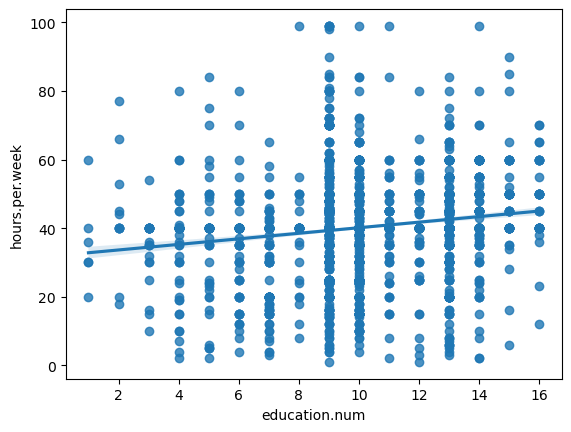

In [95]:
# Plot data and a linear regression model fit.
sns.regplot(x='education.num', y='hours.per.week', data=df)

### Two categorical variables vs one numeric variable

Show the mean age by sex and marital status

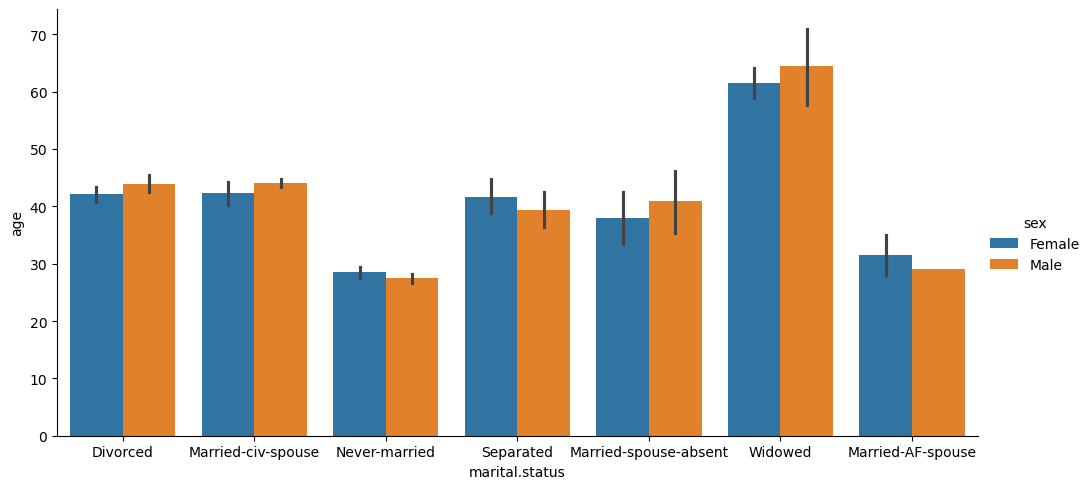

In [97]:
# In seaborn, the hue parameter determines which column in the data frame should be used for colour encoding.
sns.catplot(x='marital.status', y='age',hue='sex', data=df, kind='bar',aspect=2)

If you just want to plot part of the information, like show only marry status 'Never-married','Widowed' and 'Married-civ-spouse', use 'order=' .

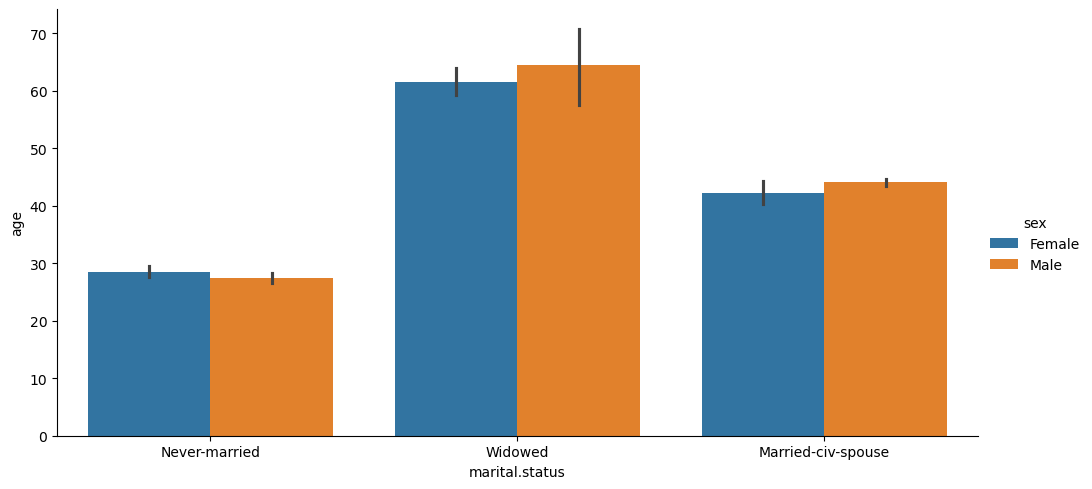

In [99]:
sns.catplot(x='marital.status', y='age',hue='sex', data=df, kind='bar',aspect=2,\
            order=['Never-married','Widowed','Married-civ-spouse'])

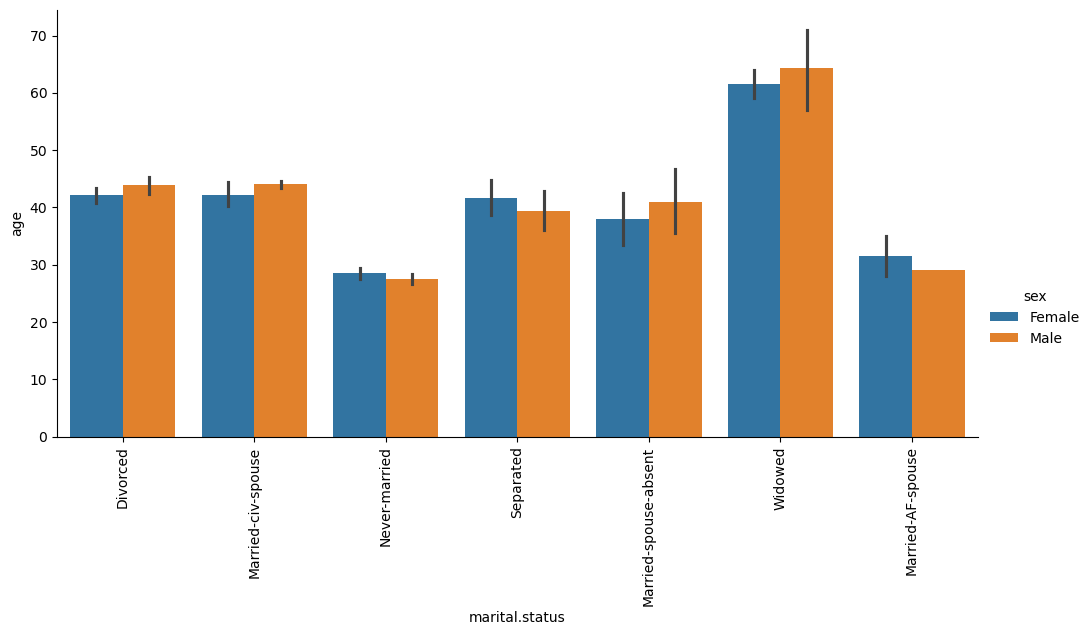

In [101]:
sns.catplot(x='marital.status', y='age',hue='sex', data=df, kind='bar',aspect=2).set_xticklabels(rotation=90)

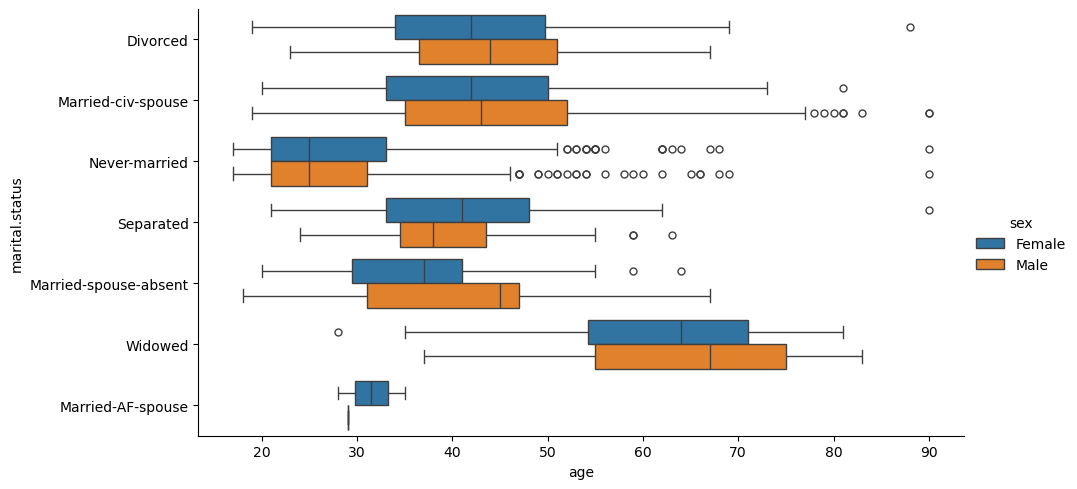

In [103]:
# The edges of the box are the 25th and 75th percentiles of the distribution of all values
sns.catplot(y='marital.status', data=df, x='age', hue='sex', aspect=2, kind='box')

### Two numeric (age, education.num) and one categorical variables (sex)

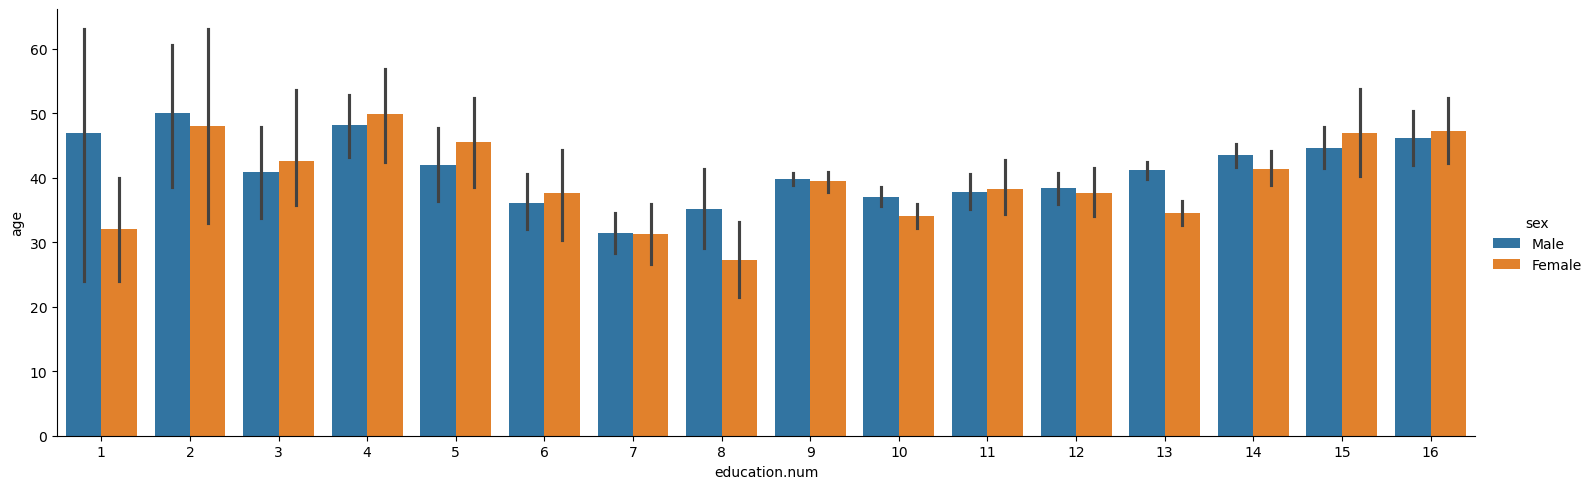

In [105]:
sns.catplot(x='education.num', y='age',hue='sex', data=df, kind='bar',aspect=3)

### Two categorical (better if ordinal) variables and one numeric variable

Find average capital gain for age and education.num

In [107]:
gr = df2.groupby(['education.num','discretized_age_EF'])['capital.gain'].mean()

In [109]:
gr

education.num  discretized_age_EF
1              (16.999, 26.0]           0.00
               (26.0, 34.0]          4508.00
               (34.0, 42.0]             0.00
               (42.0, 51.0]              NaN
               (51.0, 90.0]             0.00
                                      ...   
16             (16.999, 26.0]            NaN
               (26.0, 34.0]             0.00
               (34.0, 42.0]          1076.75
               (42.0, 51.0]          1252.00
               (51.0, 90.0]          4593.50
Name: capital.gain, Length: 80, dtype: float64

In [ ]:
# Heatmap is defined as a graphical representation of data using colors to visualize the value of the matrix.
sns.heatmap(gr.unstack(),annot=True,cmap='Reds')

### Four variables: two numeric and two categorical

In [ ]:
# Assigning a variable to col will automatically create subplots. 
# Control figure size with the height and aspect parameters
sns.catplot(x='education.num',y='age',hue='sex',col='income',data=df,kind='bar',aspect=3)

### Four variables: one numeric and three categorical

In [ ]:
sns.catplot(x='marital.status',y='age',hue='sex',col='income', data=df, kind='bar',aspect=3)